# Hedonic Pricing Lab Nora Wiktorowicz

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
! git clone https://github.com/ds4e/wrangling

fatal: destination path 'wrangling' already exists and is not an empty directory.


In [113]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


**1. Clean the data and perform some EDA and visualization to get to know the data set.**

In [114]:
#CLEANING THE DATA
print(df.dtypes) #look at data types to see what needs to be convered
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
df['Price'].head()
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
df['Host Since'].fillna("Unknown", inplace=True)
df['Host Since'].head()
df['price'] = pd.to_numeric(df['Price'], errors='coerce') #convert price and beds to numeric
df.dropna(subset=['Price'], inplace=True)
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')


Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


<ipython-input-114-b14bc23ff2ff>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Host Since'].fillna("Unknown", inplace=True)
<ipython-input-114-b14bc23ff2ff>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['Host Since'].fillna("Unknown", inplace=True)


In [115]:
print(df.isnull().sum()) #ensure missing values are dropped
df.dropna(inplace=True)
print(df.isnull().sum())

Host Id                          0
Host Since                       0
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
price                            0
dtype: int64
Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
Review Scores Rating          0
price                         0
dtype: int64


<ipython-input-116-455a5393cb29>:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df.describe(include='all')) #describe variables


             Host Id           Host Since                          Name  \
count   2.201000e+04                22010                         22010   
unique           NaN                 2199                         21471   
top              NaN  2014-02-10 00:00:00  Charming West Village studio   
freq             NaN                   54                            13   
mean    1.104878e+07                  NaN                           NaN   
std     1.080069e+07                  NaN                           NaN   
min     5.000000e+02                  NaN                           NaN   
25%     2.242476e+06                  NaN                           NaN   
50%     6.901950e+06                  NaN                           NaN   
75%     1.808719e+07                  NaN                           NaN   
max     4.272660e+07                  NaN                           NaN   

       Neighbourhood  Property Type  Review Scores Rating (bin)  \
count           22010         22

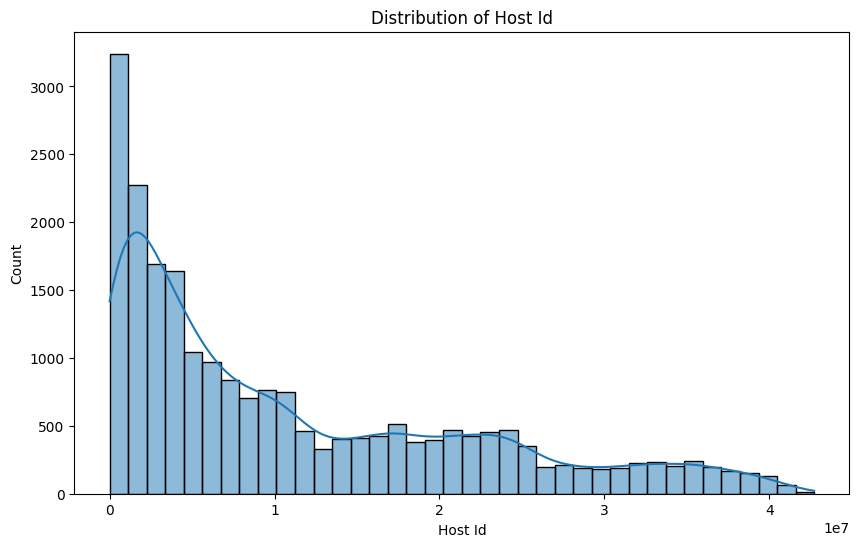

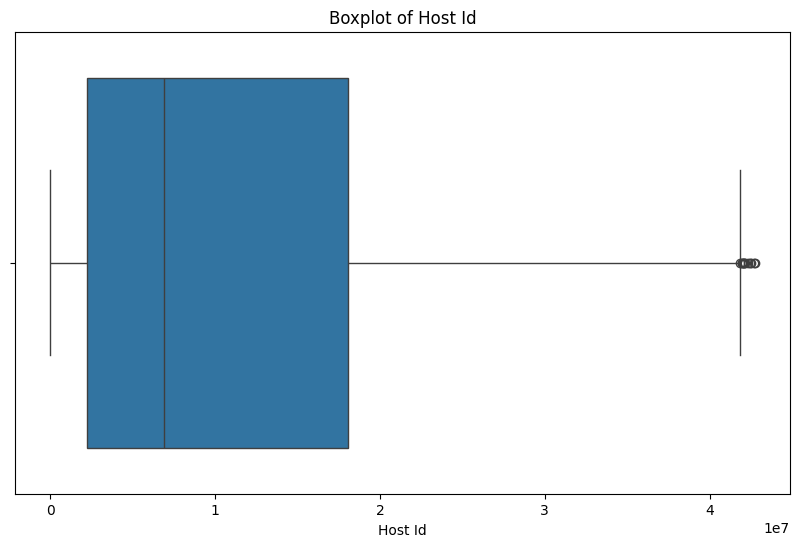

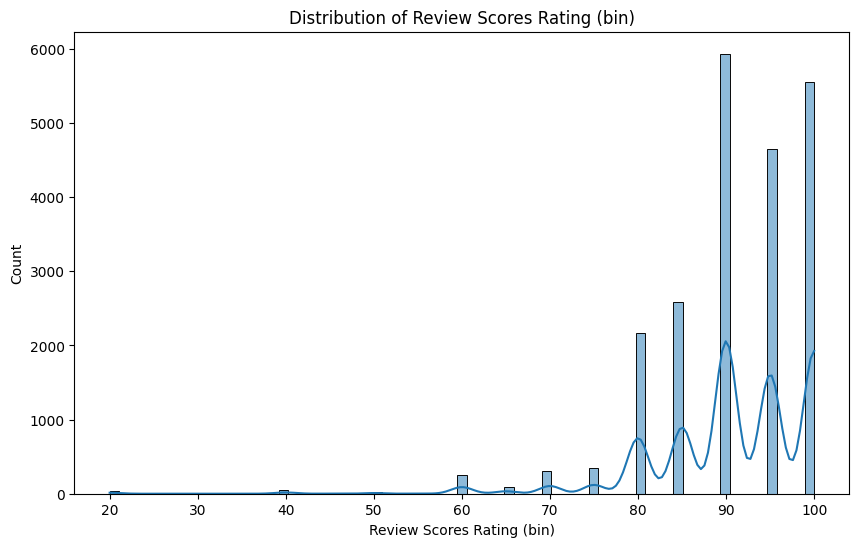

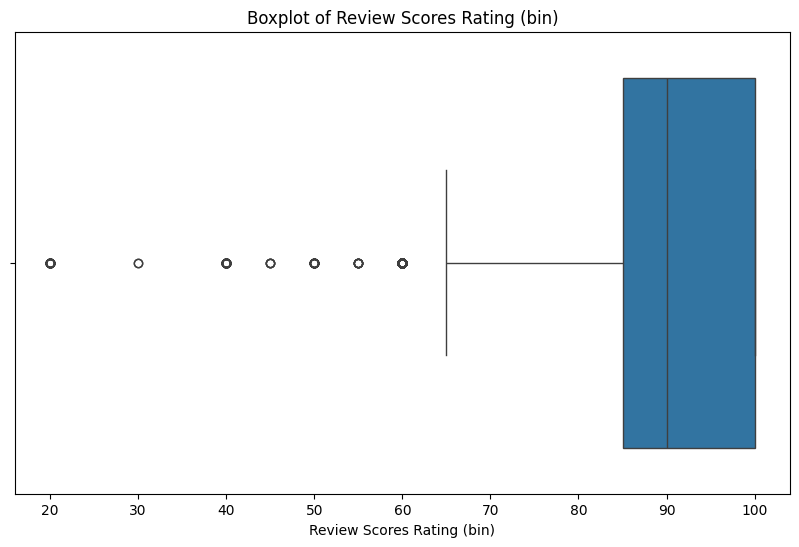

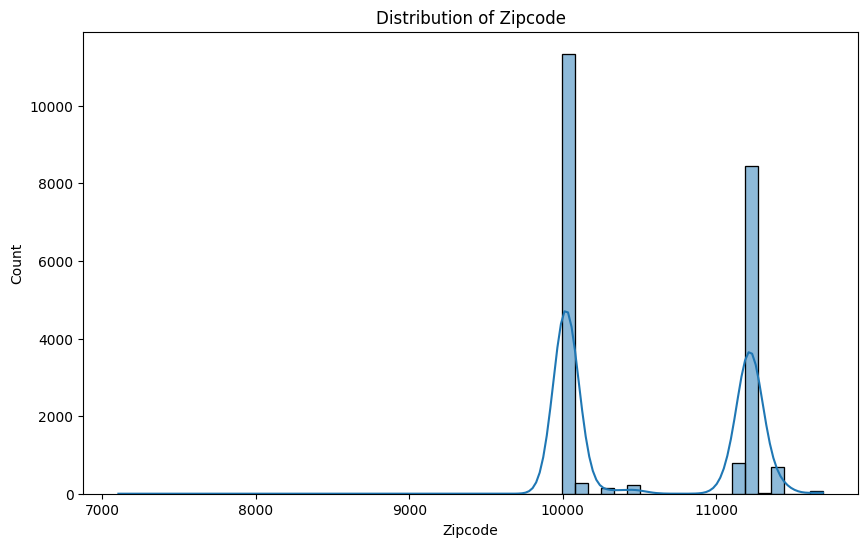

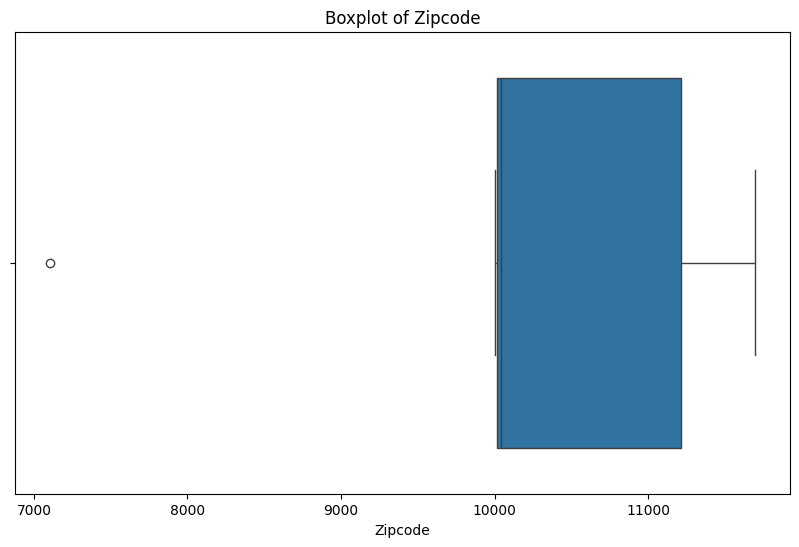

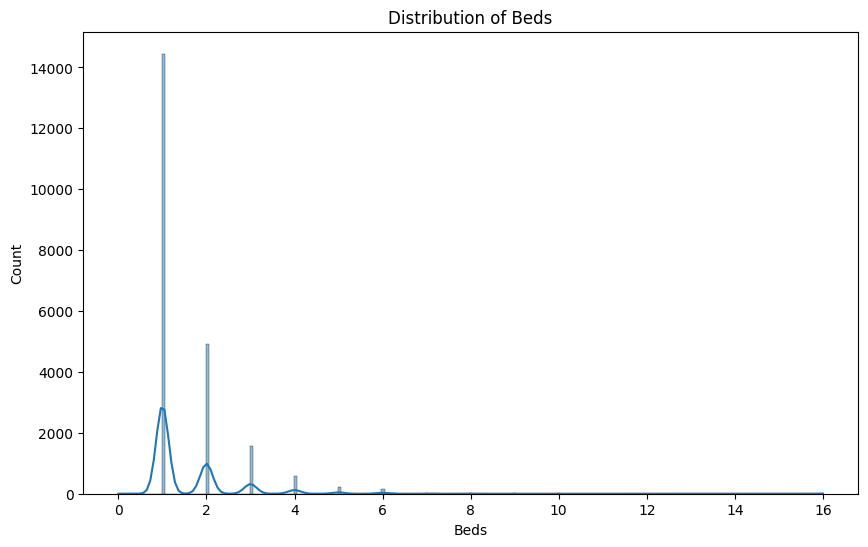

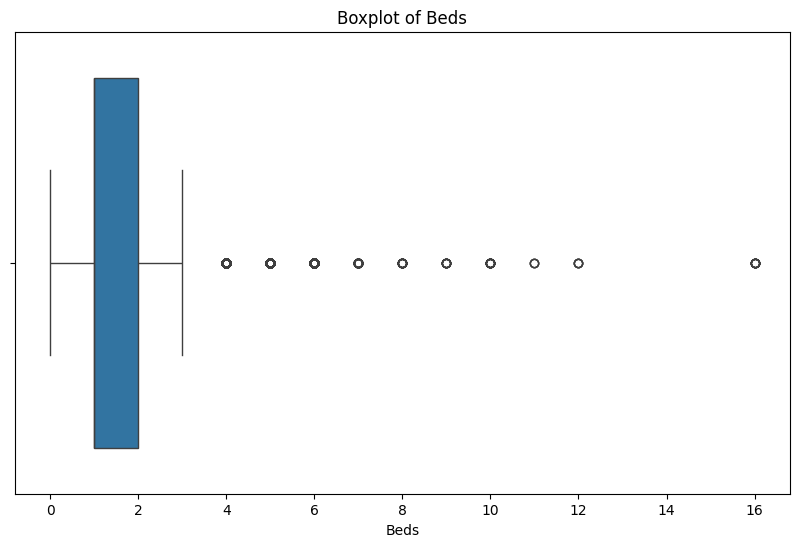

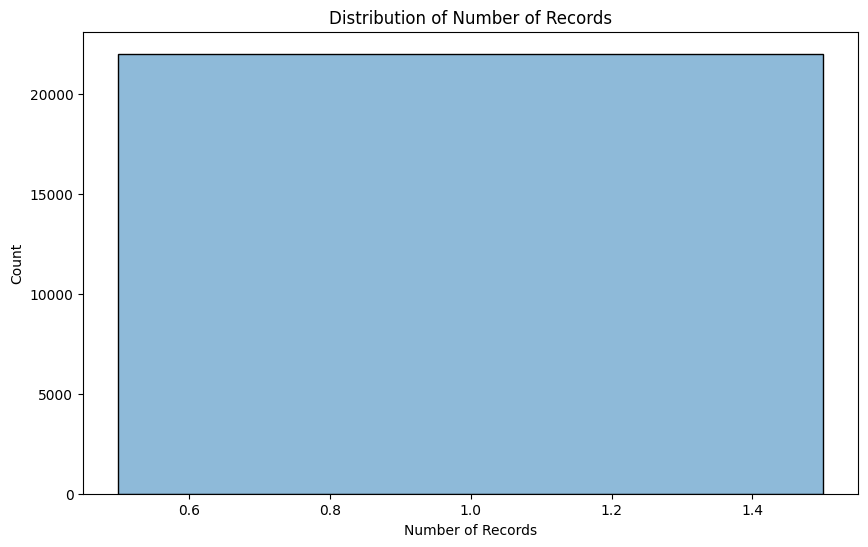

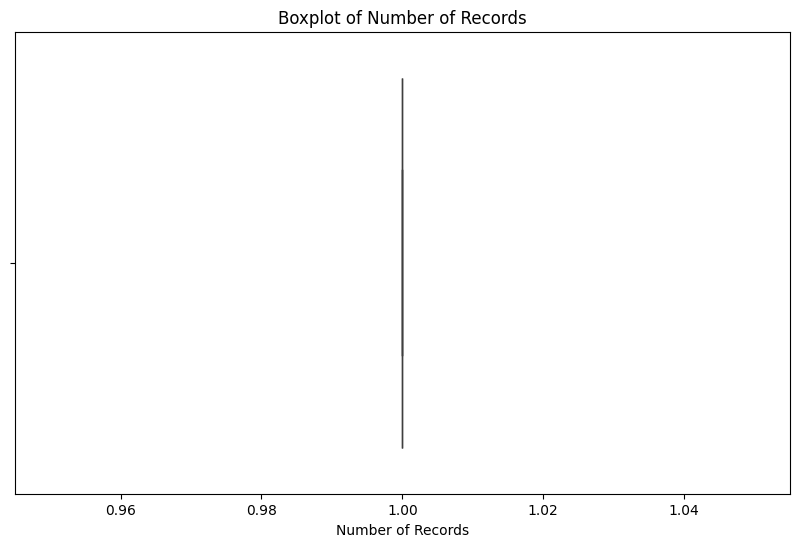

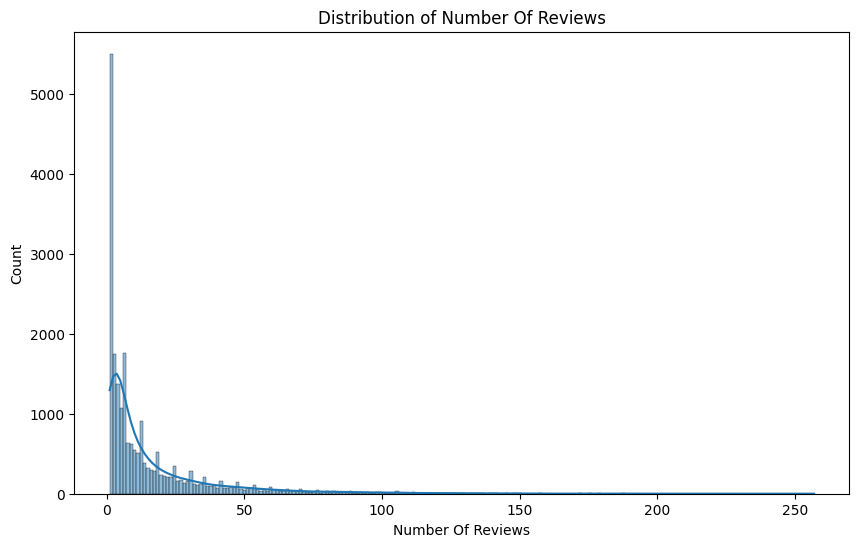

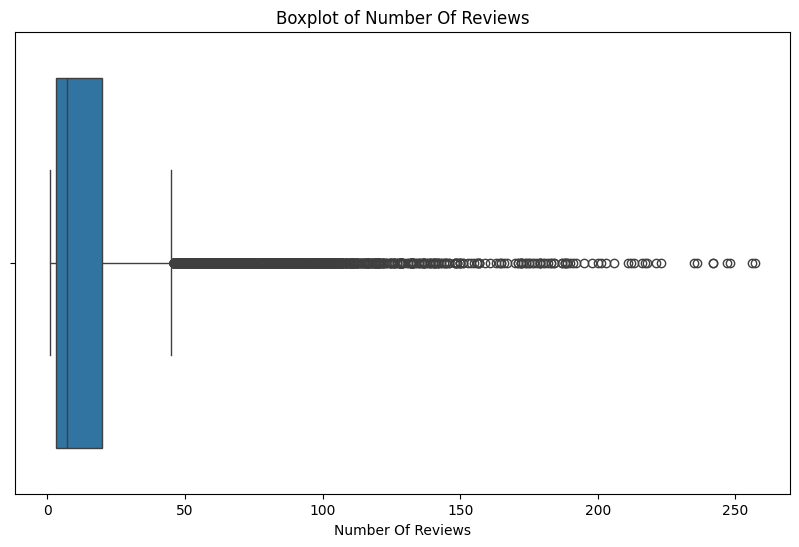

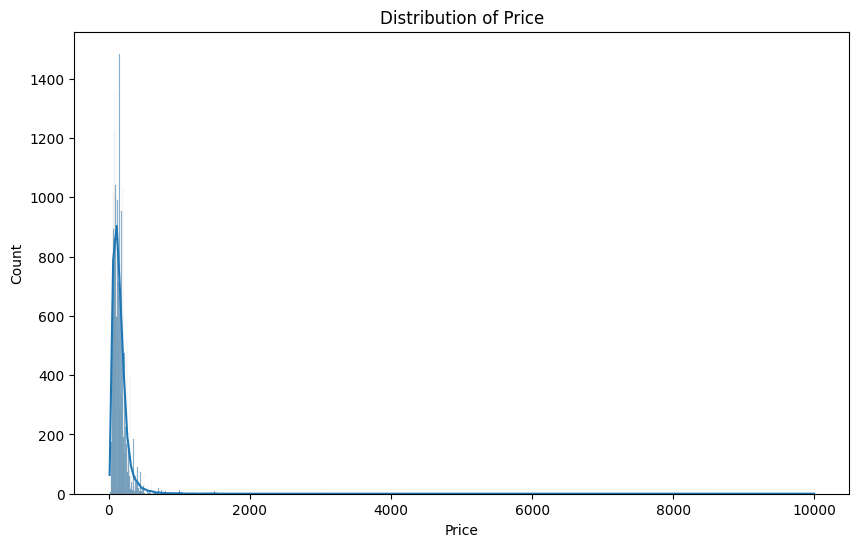

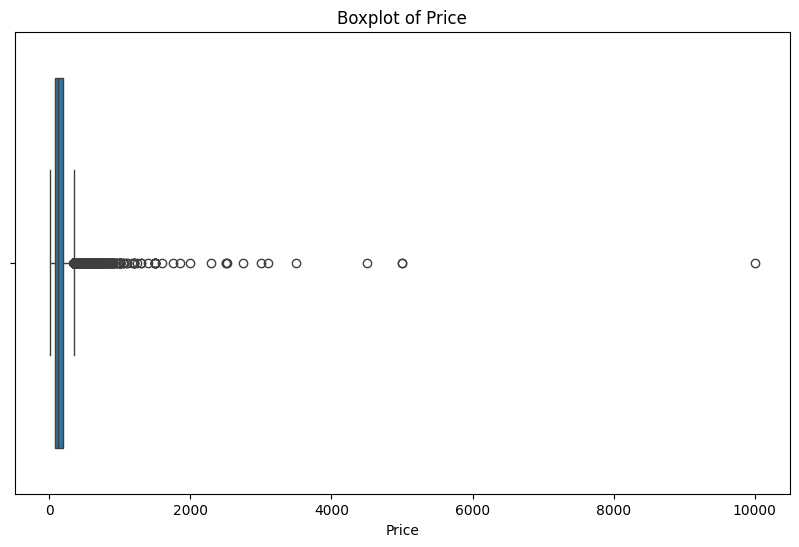

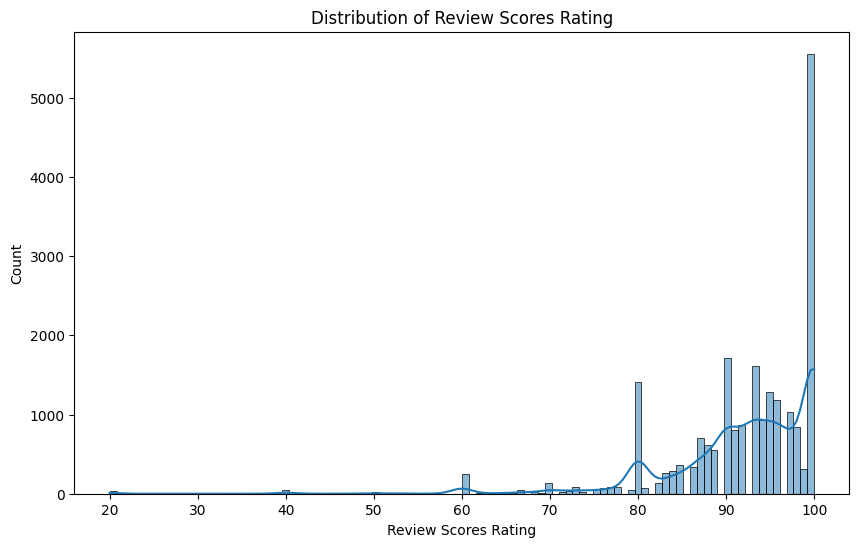

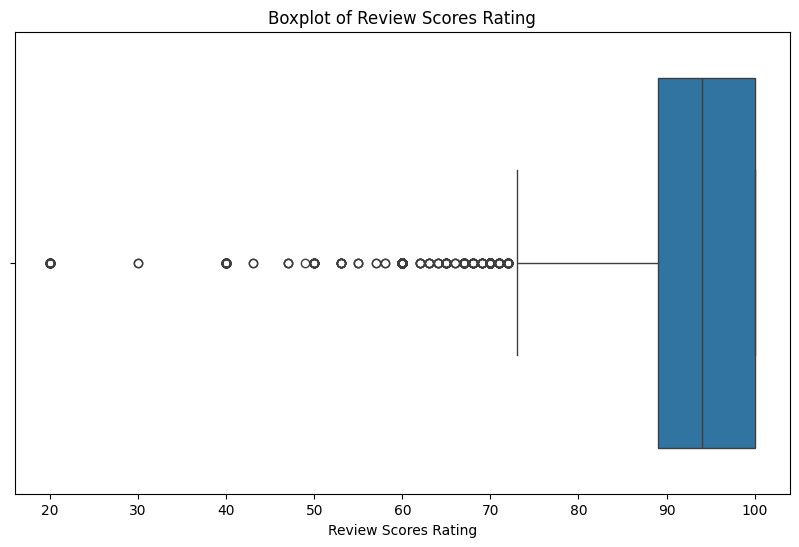

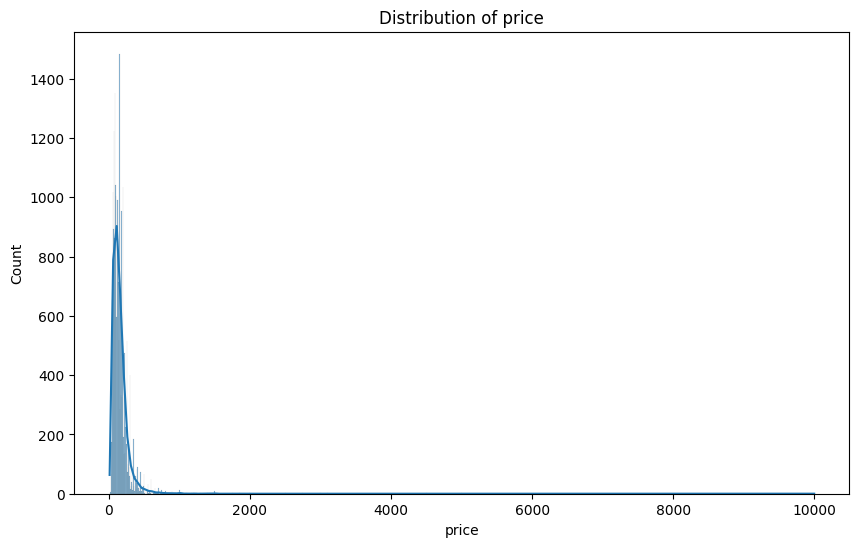

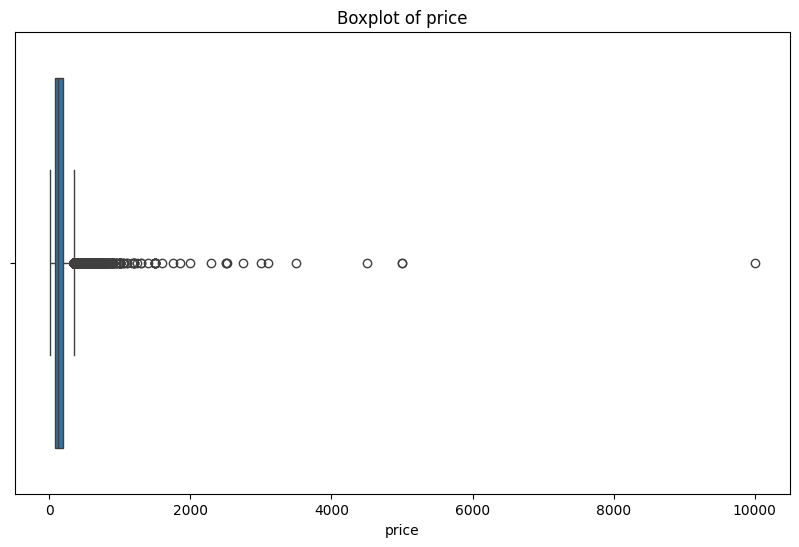

In [116]:
#PERFORM EDA
print(df.describe(include='all')) #describe variables
print(df.dtypes) #see all variable types

numerical_cols = df.select_dtypes(include=np.number).columns #see the distribution of numerical variables
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


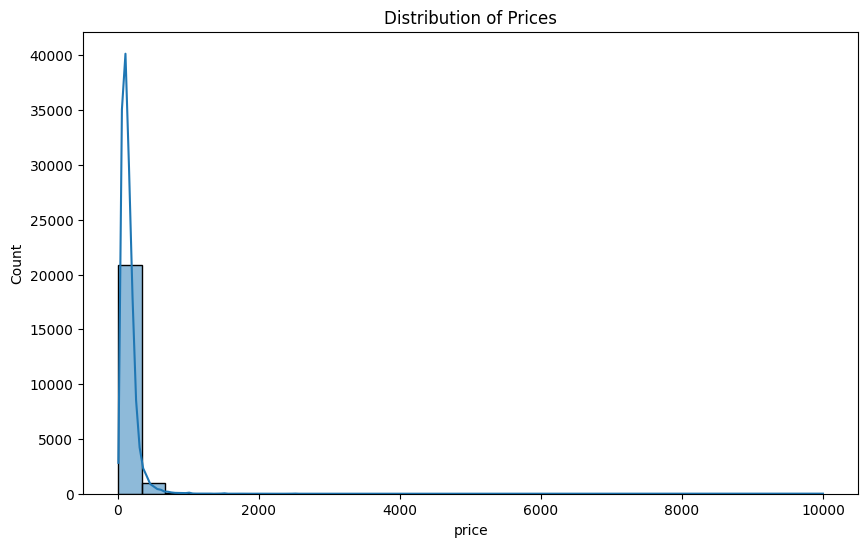

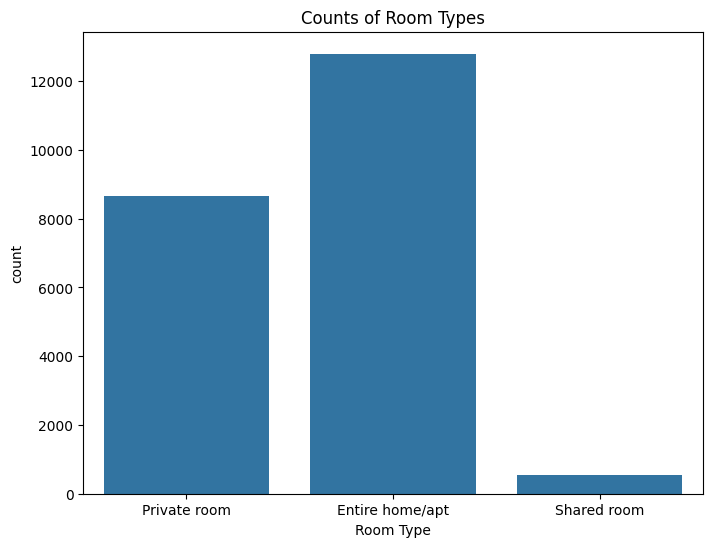

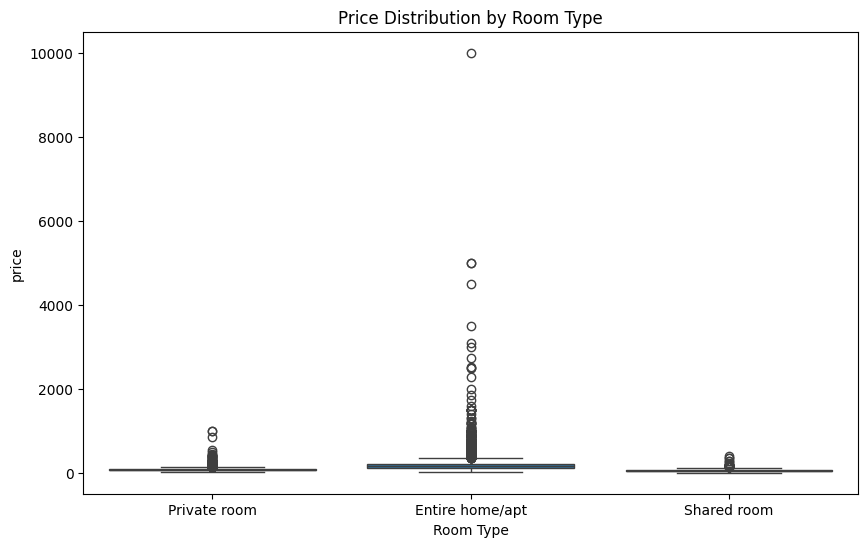

In [117]:
#ADDITIONAL VISUALIZATIONS
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Room Type', data=df) # Use the original column name 'Room Type'
plt.title('Counts of Room Types')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Room Type', y='price', data=df) # Use the original column name 'Room Type'
plt.title('Price Distribution by Room Type')
plt.show()

**2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.**

In [118]:
room_type_dummies = pd.get_dummies(df['Room Type'], prefix='Room_Type', drop_first=True) #create dummy variables
df = pd.concat([df, room_type_dummies], axis=1)
df.drop('Room Type', axis=1, inplace=True)
df['Price_log'] = np.log(df['price'])
df['Host_Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
categorical_cols = ['Name', 'Neighbourhood', 'Property_Type', 'Room_Type']
print(df.head())

   Host Id           Host Since                                 Name  \
4      500  2008-06-26 00:00:00             Trendy Times Square Loft   
5     1039  2008-07-25 00:00:00   Big Greenpoint 1BD w/ Skyline View   
6     1783  2008-08-12 00:00:00                         Amazing Also   
7     2078  2008-08-15 00:00:00  Colorful, quiet, & near the subway!   
8     2339  2008-08-20 00:00:00  East Village Cocoon: 2 Bedroom Flat   

  Neighbourhood  Property Type  Review Scores Rating (bin)  Zipcode  Beds  \
4      Manhattan     Apartment                        95.0  10036.0   3.0   
5       Brooklyn     Apartment                       100.0  11222.0   1.0   
6      Manhattan     Apartment                       100.0  10004.0   1.0   
7       Brooklyn     Apartment                        90.0  11201.0   1.0   
8      Manhattan     Apartment                        90.0  10009.0   2.0   

   Number of Records  Number Of Reviews  Price  Review Scores Rating  price  \
4                  1     

**3. Implement an ~80/~20 train-test split. Put the test data aside.**

In [119]:
from sklearn.model_selection import train_test_split
X = df.drop(['price', 'Price_log'], axis=1)  # Change 'log_price' to 'Price_log'
y = df['Price_log']  # Change 'log_price' to 'Price_log'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?**

In [120]:
#MODEL ONE
X_train_model_1 = X_train[['Beds']]
X_test_model_1 = X_test[['Beds']]

model_1 = sm.OLS(y_train, sm.add_constant(X_train_model_1)).fit()
y_train_predict_model_1 = model_1.predict(sm.add_constant(X_train_model_1))
y_test_predict_model_1 = model_1.predict(sm.add_constant(X_test_model_1))

rmse_train_model_1 = np.sqrt(mean_squared_error(y_train, y_train_predict_model_1))
rmse_test_model_1 = np.sqrt(mean_squared_error(y_test, y_test_predict_model_1))
r2_train_model_1 = model_1.rsquared
r2_test_model_1 = model_1.rsquared_adj

print("Model One: Beds")
print(f"Training RMSE: {rmse_train_model_1:.2f}")
print(f"Test RMSE: {rmse_test_model_1:.2f}")
print(f"Training R-squared: {r2_train_model_1:.2f}")
print(f"Test R-squared: {r2_test_model_1:.2f}")
print("\n")

Model One: Beds
Training RMSE: 0.53
Test RMSE: 0.54
Training R-squared: 0.17
Test R-squared: 0.17




In [121]:
#MODEL TWO
X_train_model_2 = X_train[['Review Scores Rating']]
X_test_model_2 = X_test[['Review Scores Rating']]

model_2 = sm.OLS(y_train, sm.add_constant(X_train_model_2)).fit()
y_train_predict_model_2 = model_2.predict(sm.add_constant(X_train_model_2))
y_test_predict_model_2 = model_2.predict(sm.add_constant(X_test_model_2))

rmse_train_model_2 = np.sqrt(mean_squared_error(y_train, y_train_predict_model_2))
rmse_test_model_2 = np.sqrt(mean_squared_error(y_test, y_test_predict_model_2))
r2_train_model_2 = model_2.rsquared
r2_test_model_2 = model_2.rsquared_adj

print("Model Two: Review Scores Rating")
print(f"Training RMSE: {rmse_train_model_2:.2f}")
print(f"Test RMSE: {rmse_test_model_2:.2f}")
print(f"Training R-squared: {r2_train_model_2:.2f}")
print(f"Test R-squared: {r2_test_model_2:.2f}")
print("\n")

Model Two: Review Scores Rating
Training RMSE: 0.58
Test RMSE: 0.59
Training R-squared: 0.01
Test R-squared: 0.01




In [122]:
#MODEL THREE:
X_train_model_3 = X_train[['Beds', 'Room_Type_Private room']].astype(float)
X_test_model_3 = X_test[['Beds', 'Room_Type_Private room']].astype(float)

model_3 = sm.OLS(y_train, sm.add_constant(X_train_model_3)).fit()
y_train_predict_model_3 = model_3.predict(sm.add_constant(X_train_model_3))
y_test_predict_model_3 = model_3.predict(sm.add_constant(X_test_model_3))

rmse_train_model_3 = np.sqrt(mean_squared_error(y_train, y_train_predict_model_3))
rmse_test_model_3 = np.sqrt(mean_squared_error(y_test, y_test_predict_model_3))
r2_train_model_3 = model_3.rsquared
r2_test_model_3 = model_3.rsquared_adj

print("Model 3: Beds and Room Type Private Room")
print(f"Training RMSE: {rmse_train_model_3:.2f}")
print(f"Test RMSE: {rmse_test_model_3:.2f}")
print(f"Training R-squared: {r2_train_model_3:.2f}")
print(f"Test R-squared: {r2_test_model_3:.2f}")
print("\n")

Model 3: Beds and Room Type Private Room
Training RMSE: 0.44
Test RMSE: 0.45
Training R-squared: 0.43
Test R-squared: 0.43




After fitting these models, I can see their RMSE scores and R^2 on both the training and the test set. Model 3 has the higher R squared value of 0.43, compared to model one and model two's R^2 values of 0.17 and 0.01, respectively. This means that the model can better explain variance within the model/data. Furthermore, model 3 has the lowest RMSE score of 0.45, compared to model one and two's scores of 0.54 and 0.59, respectively. This means that model three has the smallest prediction error. Therefore, model three was the best performing model.

**5.Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?**

<Figure size 800x600 with 0 Axes>

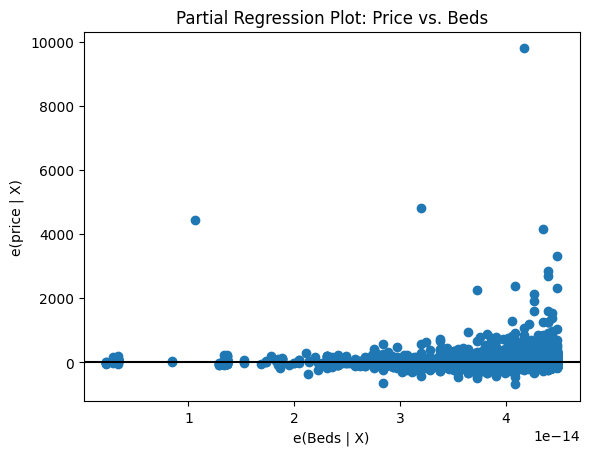

<Figure size 800x600 with 0 Axes>

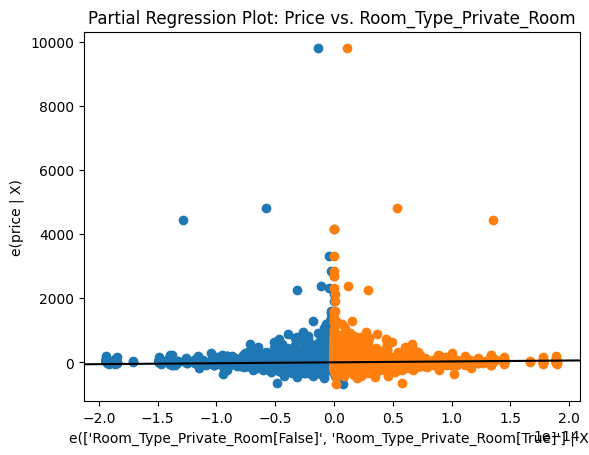

<Figure size 800x600 with 0 Axes>

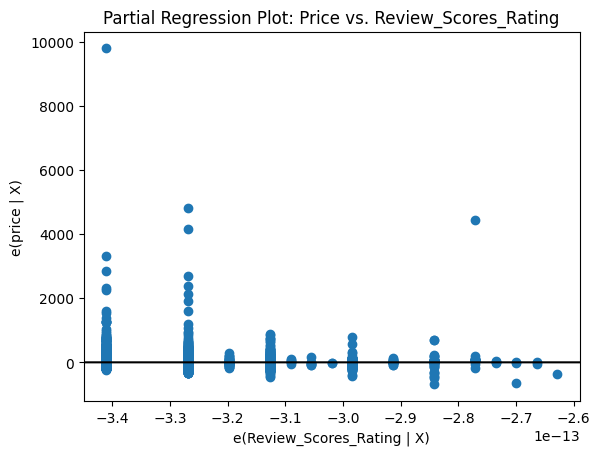

In [123]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.regressionplots import plot_partregress
df = df.rename(columns={'Room_Type_Private room': 'Room_Type_Private_Room'})
df = df.rename(columns={'Review Scores Rating': 'Review_Scores_Rating'})
for col in ['Beds', 'Room_Type_Private_Room', 'Review_Scores_Rating']:
    fig = plt.figure(figsize=(8, 6))
    plot_partregress(endog='price', exog_i=col, exog_others=['Beds', 'Room_Type_Private_Room', 'Review_Scores_Rating'], data=df, obs_labels=False)
    plt.title(f'Partial Regression Plot: Price vs. {col}')
    plt.show()

The most significant non-linearity is the plot of price versus review scores rating, as the relationship does not appear to be linear/highly correlated.

**6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?**

In [125]:
X_train['beds_x_rating'] = X_train['Beds'] * X_train['Review Scores Rating']
X_test['beds_x_rating'] = X_test['Beds'] * X_test['Review Scores Rating']
X_train['log_reviews'] = np.log1p(X_train['Number Of Reviews'])  # Use log1p to handle zero values
X_test['log_reviews'] = np.log1p(X_test['Number Of Reviews'])


# Build the complex model
X_train_complex = X_train[['Beds', 'Room_Type_Private room', 'beds_x_rating', 'log_reviews']]
X_test_complex = X_test[['Beds', 'Room_Type_Private room', 'beds_x_rating', 'log_reviews']]

X_train_complex = X_train_complex.astype(float) # Convert all columns to numeric
X_test_complex = X_test_complex.astype(float)

model_complex = sm.OLS(y_train, sm.add_constant(X_train_complex)).fit()

y_train_predict_complex = model_complex.predict(sm.add_constant(X_train_complex))
y_test_predict_complex = model_complex.predict(sm.add_constant(X_test_complex))

rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_train_predict_complex))
rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_test_predict_complex))

r2_train_complex = model_complex.rsquared
r2_test_complex = model_complex.rsquared_adj

print("Complex Model:")
print(f"Training RMSE: {rmse_train_complex:.2f}")
print(f"Test RMSE: {rmse_test_complex:.2f}")
print(f"Training R-squared: {r2_train_complex:.2f}")
print(f"Test R-squared: {r2_test_complex:.2f}")
print("\n")


Complex Model:
Training RMSE: 0.44
Test RMSE: 0.45
Training R-squared: 0.44
Test R-squared: 0.44




In [126]:
print("Comparison with model 3:")
print("Model  (Beds, Room Type_Private room):")
print(f"Training RMSE: {rmse_train_model_3:.2f}")
print(f"Test RMSE: {rmse_test_model_3:.2f}")
print(f"Training R-squared: {r2_train_model_3:.2f}")
print(f"Test R-squared: {r2_test_model_3:.2f}")

Comparison with model 3:
Model  (Beds, Room Type_Private room):
Training RMSE: 0.44
Test RMSE: 0.45
Training R-squared: 0.43
Test R-squared: 0.43


The more complex model with interactions and transformations performed slightly better than model 3 (the simpler model from above). The more complex model has a slightly better R^2 value of 0.44 compared to 0.43, meaning that the model explains slightly more variance in the target variable. The models have the same RMSE value, meaning that the prediction errors appear to be the same.

**7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?**

In [127]:
print("\nSummary:")
print("Model One: Beds")
print(f"  RMSE Train: {rmse_train_model_1}, RMSE Test: {rmse_test_model_1}, R2 Train: {r2_train_model_1}, R2 Test: {r2_test_model_1}")
print("Model Two: Review Scores Rating")
print(f"  RMSE Train: {rmse_train_model_2}, RMSE Test: {rmse_test_model_2}, R2 Train: {r2_train_model_2}, R2 Test: {r2_test_model_2}")
print("Model Three: Beds and Room Type")
print(f"  RMSE Train: {rmse_train_model_3}, RMSE Test: {rmse_test_model_3}, R2 Train: {r2_train_model_3}, R2 Test: {r2_test_model_3}")
print("Complex Model with Interactions/Transformations")
print(f"  RMSE Train: {rmse_train_complex}, RMSE Test: {rmse_test_complex}, R2 Train: {r2_train_complex}, R2 Test: {r2_test_complex}")



Summary:
Model One: Beds
  RMSE Train: 0.5347844287331947, RMSE Test: 0.5413879470326474, R2 Train: 0.16592594264474503, R2 Test: 0.16587856822367508
Model Two: Review Scores Rating
  RMSE Train: 0.581737698551829, RMSE Test: 0.5852480225905966, R2 Train: 0.013035519507954008, R2 Test: 0.012979461091477074
Model Three: Beds and Room Type
  RMSE Train: 0.44242267541383357, RMSE Test: 0.44946992523775303, R2 Train: 0.4291501887867669, R2 Test: 0.4290853379135817
Complex Model with Interactions/Transformations
  RMSE Train: 0.43959334351955437, RMSE Test: 0.4459346587496983, R2 Train: 0.43642811208753607, R2 Test: 0.43630004939642375


In 1-6, many steps were taken. First, I cleaned the data by removing missing values and converting relevant columns to their appropriate data types (for example numeric, and datetime for "host_since"). Exploratory data analysis was conducted, where I saw included descriptive statistics and visualizations including histograms and boxplots to summarize variables and look for outliers.
Categorical variables were transformed into dummy variables for use in regression. The target variable "price" was log-transformed to address potential non-linearity as there were outliers seen in EDA and visalizations. Three models were built using a combination of predictor varibales including bed, review scores, and room type private room. The RMSE and R^2 values were compared to see that model three was the most effective model, meaning that both the number of beds and room type contributed to predicting price. Model 3 had an R^2 of .43 and RMSE of 0.45. Partial regression plots were used to visualize the relationship between each predictor variable and the target variable, holding other variables constant. The partial regression plot between price and review scores indicated potential non-linearity. A more complex model was created including interaction terms and transformations (log of number of reviews and the interaction between beds and review score rating). The complex model shows a minor improvement in predictive power compared to model 3, as shown by a slightly higher R^2, though RMSE is about the same.


I learned information about overfitting, underfitting, and model selection from this lab. The results from comparing simple models to the complex model illustrate principles of model selection. The minor improvement of the complex model over Model 3 (simple model) suggests that adding extra interactions and transforms does not lead to substantial gains, and may be prone to overfitting. In this context, Model 3 seems to be a good balance between model complexity and performance. Additionally, I learned that it is very important to use train/test to analyze potential overfitting or underfitting.


**8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.**

In [128]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

lasso_model = Lasso(alpha=0.1) #utilize lasso
lasso_model.fit(X_train_complex, y_train)
y_train_pred_lasso = lasso_model.predict(X_train_complex)
y_test_pred_lasso = lasso_model.predict(X_test_complex)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

r2_train_lasso = lasso_model.score(X_train_complex, y_train)
r2_test_lasso = lasso_model.score(X_test_complex, y_test)

print("Lasso Regression Results:")
print(f"Training RMSE: {rmse_train_lasso:.2f}")
print(f"Test RMSE: {rmse_test_lasso:.2f}")
print(f"Training R-squared: {r2_train_lasso:.2f}")
print(f"Test R-squared: {r2_test_lasso:.2f}")
selected_features = X_train_complex.columns[lasso_model.coef_ != 0]
print("\nSelected Features:")
selected_features

Lasso Regression Results:
Training RMSE: 0.49
Test RMSE: 0.50
Training R-squared: 0.30
Test R-squared: 0.29

Selected Features:


Index(['Room_Type_Private room', 'beds_x_rating'], dtype='object')